In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 전처리

결측치 처리

In [6]:
# Age - 평균으로 채우기
titanic['Age'].fillna(int(titanic['Age'].mean()),inplace = True)

In [7]:
# Cabin - 열 삭제
titanic.drop('Cabin', axis = 1, inplace = True)

In [8]:
# Embarked - 결측치 행 삭제
titanic.dropna(subset=['Embarked'], inplace = True)

In [9]:
# 결측치 처리 확인
titanic.isna().sum().sum()

0

이상치 처리

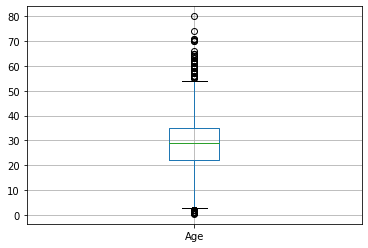

In [10]:
# 변수별 boxplot 확인
titanic.boxplot(['Age']);

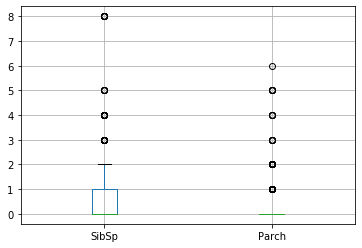

In [11]:
titanic.boxplot(['SibSp', 'Parch']);

In [12]:
titanic[titanic['SibSp']>5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,29.0,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.0,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,29.0,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.0,8,2,CA. 2343,69.55,S


In [13]:
titanic[titanic['SibSp']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,S


In [14]:
titanic[titanic['Parch']==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,S


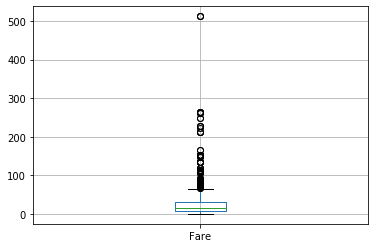

In [15]:
titanic.boxplot(['Fare']);

In [16]:
titanic[titanic['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [17]:
MAX = titanic['Fare'][titanic['Fare']<300].max()
print(MAX)

263.0


In [18]:
titanic['Fare'] = titanic['Fare'].mask(titanic['Fare']>300, MAX)
titanic['Fare'].describe()

count    889.000000
mean      31.255300
std       43.244922
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      263.000000
Name: Fare, dtype: float64

In [19]:
titanic[titanic['Fare']<4].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,31.866667,0.0,0.0,0.0
std,225.808958,0.258199,0.798809,7.288608,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,290.500000,0.000000,1.000000,29.000000,0.0,0.0,0.0
50%,482.000000,0.000000,2.000000,29.000000,0.0,0.0,0.0
75%,704.000000,0.000000,2.500000,37.000000,0.0,0.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0


In [20]:
titanic = titanic[titanic['Fare']>=4]
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,444.791762,0.387872,2.318078,29.473879,0.533181,0.389016,31.791718
std,257.446275,0.487544,0.834243,13.045534,1.110987,0.812090,43.418692
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,221.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,444.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,666.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


# 변수 선정

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  874 non-null    int64  
 1   Survived     874 non-null    int64  
 2   Pclass       874 non-null    int64  
 3   Name         874 non-null    object 
 4   Sex          874 non-null    object 
 5   Age          874 non-null    float64
 6   SibSp        874 non-null    int64  
 7   Parch        874 non-null    int64  
 8   Ticket       874 non-null    object 
 9   Fare         874 non-null    float64
 10  Embarked     874 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 81.9+ KB


문자열 제거 : Name, Ticket\
문자열 인코딩 : Sex, Embarked\
그 외 : PassengerId - 삭제

In [22]:
new_titanic = titanic.drop(['Name', 'Ticket', 'PassengerId'], axis = 1)

In [23]:
new_titanic = pd.get_dummies(new_titanic)

In [24]:
new_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# 변수 정규화

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_titanic)
titanic_scaled = scaler.transform(new_titanic)

titanic_df = pd.DataFrame(data=titanic_scaled, columns=new_titanic.columns)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.012501,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.259745,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015107,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.189536,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015590,0.0,1.0,0.0,0.0,1.0


# 학습 데이터 / 테스트 데이터 분리

In [35]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(['Survived'], axis = 1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

# 모델 학습

In [36]:
from sklearn.tree import DecisionTreeClassifier

df_clf = DecisionTreeClassifier()
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
pred = df_clf.predict(X_test)

# 성과 평가

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision,recall))
    
get_clf_eval(y_test,pred)

오차행렬
[[87 23]
 [20 45]]
정확도: 0.7543, 정밀도 : 0.6618, 재현율 : 0.6923


# (Cross_val_score)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

df_clf = DecisionTreeClassifier()

scores = cross_val_score(df_clf, X, y, scoring = 'accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores,4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.7397 0.7663 0.7629]
평균 검증 정확도:  0.7563


# (GridSearchCV)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dtree = DecisionTreeClassifier()

parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

In [32]:
grid_dtree = GridSearchCV(dtree,param_grid = parameters, cv=3, refit = True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
           'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.783977,3,0.789700,0.819742,0.742489
1,"{'max_depth': 1, 'min_samples_split': 3}",0.783977,3,0.789700,0.819742,0.742489
2,"{'max_depth': 2, 'min_samples_split': 2}",0.782546,5,0.793991,0.806867,0.746781
3,"{'max_depth': 2, 'min_samples_split': 3}",0.782546,5,0.793991,0.806867,0.746781
4,"{'max_depth': 3, 'min_samples_split': 2}",0.814020,1,0.828326,0.828326,0.785408
5,"{'max_depth': 3, 'min_samples_split': 3}",0.814020,1,0.828326,0.828326,0.785408


In [33]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.8140


In [34]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.7943
